# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_04ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,ixz-00001-00002,"['--enable-encoders=lzma1,armthumb', '--enable...",-1.0000,-1
1,1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,ia...",-1.0000,-1
2,2,ixz-00001-00004,"['--enable-encoders=lzma1,x86', '--enable-deco...",-1.0000,-1
3,3,ixz-00001-00005,"['--enable-encoders=lzma1,lzma2', '--enable-de...",-1.0000,-1
4,4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1', ...",-1.0000,-1
...,...,...,...,...,...
375,375,ixz-00020-00015,"['--enable-debug', '--enable-encoders=lzma1,x8...",-1.0000,-1
376,376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",10.3055,1075712
377,377,ixz-00020-00017,"['--enable-debug', '--enable-encoders=lzma1,lz...",11.5275,1219080
378,378,ixz-00020-00018,"['--enable-debug', '--enable-encoders=lzma1,lz...",11.0140,1115768


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,ixz-00001-00002,"['--enable-encoders=lzma1,armthumb', '--enable...",-1.0000,-1,ixz,00001,00002
1,1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,ia...",-1.0000,-1,ixz,00001,00003
2,2,ixz-00001-00004,"['--enable-encoders=lzma1,x86', '--enable-deco...",-1.0000,-1,ixz,00001,00004
3,3,ixz-00001-00005,"['--enable-encoders=lzma1,lzma2', '--enable-de...",-1.0000,-1,ixz,00001,00005
4,4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1', ...",-1.0000,-1,ixz,00001,00006
...,...,...,...,...,...,...,...,...
375,375,ixz-00020-00015,"['--enable-debug', '--enable-encoders=lzma1,x8...",-1.0000,-1,ixz,00020,00015
376,376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",10.3055,1075712,ixz,00020,00016
377,377,ixz-00020-00017,"['--enable-debug', '--enable-encoders=lzma1,lz...",11.5275,1219080,ixz,00020,00017
378,378,ixz-00020-00018,"['--enable-debug', '--enable-encoders=lzma1,lz...",11.0140,1115768,ixz,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                               \
Br1        00001    00002    00003    00004    00005   00006   00007    00008   
Br2                                                                             
00001        NaN  -1.0000  -1.0000  -1.0000  -1.0000 -1.0000 -1.0000  -1.0000   
00002    -1.0000      NaN   9.9475  10.4525  10.0180 -1.0000 -1.0000  10.2620   
00003    -1.0000  10.9065      NaN  11.3025  10.9345 -1.0000 -1.0000  11.2805   
00004    -1.0000   9.4630   9.4950      NaN   9.5565 -1.0000 -1.0000   9.7955   
00005    -1.0000  10.0860  10.1140  10.3275      NaN -1.0000  0.8135  10.1805   
00006    -1.0000  -1.0000  -1.0000  -1.0000  -1.0000     NaN -1.0000  -1.0000   
00007    -1.0000  -1.0000  -1.0000  -1.0000   0.4720 -1.0000     NaN  -1.0000   
00008    -1.0000   9.7450   9.8900  10.0735   9.8420 -1.0000 -1.0000      NaN   
00009    -1.0000  10.1005  10.5535  10.4060  10.2635 -1.0000 -1.0000  10.1240   
00010    -1.0000  -1.0000  -1.0000  -1.0000  -1.0000  0.9455 -1.0000  -1.0000   
00011    -1.0000  -1.0000  -1.0000  -1.0000  -1.0000 -1.0000 -1.0000  -1.0000   
00012    -1.0000  10.3140  10.1695  10.4195  10.6835 -1.0000 -1.0000  10.2120   
00013     0.8875  10.4175  10.6145  10.9270  10.4980 -1.0000 -1.0000  10.7525   
00014    -1.0000  11.4980  11.5080  11.6810  11.9570 -1.0000 -1.0000  11.4930   
00015    -1.0000  -1.0000  -1.0000  -1.0000  -1.0000 -1.0000 -1.0000  -1.0000   
00016    -1.0000  10.2270  10.4660  10.6580  10.2705 -1.0000 -1.0000  10.3080   
00017    -1.0000  11.3925  11.3860  11.7565  11.5080 -1.0000 -1.0000  11.8130   
00018    -1.0000  10.9560  11.1745  11.2860  10.9490 -1.0000 -1.0000  11.1935   
00019    -1.0000  -1.0000  -1.0000  -1.0000  -1.0000 -1.0000 -1.0000  -1.0000   
00020    -1.0000   9.7690   9.8120  10.0855  10.0890 -1.0000 -1.0000  10.1215   

                                                                        \
Br1      00009 00010 00011    00012    00013    00014   00015    00016   
Br2                                                                      
00001  -1.0000  -1.0  -1.0  -1.0000   0.8615  -1.0000 -1.0000  -1.0000   
00002  10.3235  -1.0  -1.0  10.2830   9.9420  10.2435 -1.0000  10.2635   
00003  11.2640  -1.0  -1.0  11.3635  11.0170  11.3710 -1.0000  11.4085   
00004   9.7655  -1.0  -1.0   9.8095   9.5175   9.7815 -1.0000   9.8035   
00005  10.2535  -1.0  -1.0  10.2485  10.1760  10.3665 -1.0000  10.2820   
00006  -1.0000  -1.0  -1.0  -1.0000  -1.0000  -1.0000 -1.0000  -1.0000   
00007  -1.0000  -1.0  -1.0  -1.0000  -1.0000  -1.0000 -1.0000  -1.0000   
00008   9.7400  -1.0  -1.0   9.7650   9.8015   9.7765 -1.0000   9.7430   
00009      NaN  -1.0  -1.0  10.1910  10.2285  10.2395 -1.0000  10.2265   
00010  -1.0000   NaN  -1.0  -1.0000  -1.0000  -1.0000 -1.0000  -1.0000   
00011  -1.0000  -1.0   NaN  -1.0000  -1.0000  -1.0000 -1.0000  -1.0000   
00012  10.2760  -1.0  -1.0      NaN  10.3620  10.3700 -1.0000  10.3870   
00013  10.7475  -1.0  -1.0  10.7620      NaN  10.8135 -1.0000  10.7680   
00014  11.5860  -1.0  -1.0  11.5930  11.5280      NaN -1.0000  11.6010   
00015  -1.0000  -1.0  -1.0  -1.0000  -1.0000  -1.0000     NaN  -1.0000   
00016  10.2275  -1.0  -1.0  10.2835  10.2965  10.2500 -1.0000      NaN   
00017  11.7455  -1.0  -1.0  11.8280  11.4455  11.7485  1.9065  11.7925   
00018  11.4125  -1.0  -1.0  11.3690  10.9780  11.3515 -1.0000  11.3235   
00019  -1.0000  -1.0  -1.0  -1.0000  -1.0000  -1.0000 -1.0000  -1.0000   
00020  10.0810  -1.0  -1.0  10.0880   9.8025  10.0825 -1.0000  10.1015   

                                          
Br1      00017    00018   00019    00020  
Br2                                       
00001  -1.0000  -1.0000 -1.0000  -1.0000  
00002   9.9335   9.9660 -1.0000   9.9865  
00003  10.9300  10.9970 -1.0000  10.9570  
00004   9.4795   9.5110 -1.0000   9.4635  
00005  10.1165  10.1395 -1.0000  10.0825  
00006  -1.0000  -1.0000 -1.0000  -1.0000  
00007  -1.0000  -1.0000 -1.0000  -1.0000  
00008   9

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00002)"
00002,"(Build Time, 00001)"
00003,"(Build Time, 00001)"
00004,"(Build Time, 00001)"
00005,"(Build Time, 00001)"
00006,"(Build Time, 00001)"
00007,"(Build Time, 00001)"
00008,"(Build Time, 00001)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN       -1.0       -1.0       -1.0       -1.0       -1.0   
00002        -1.0        NaN  1062464.0  1062464.0  1062464.0       -1.0   
00003        -1.0  1240560.0        NaN  1240560.0  1240560.0       -1.0   
00004        -1.0   988312.0   988312.0        NaN   988312.0       -1.0   
00005        -1.0  1069992.0  1069992.0  1069992.0        NaN       -1.0   
00006        -1.0       -1.0       -1.0       -1.0       -1.0        NaN   
00007   1230232.0  1062464.0  1240560.0   988312.0  1069992.0  1239264.0   
00008   1230232.0   960144.0   960144.0   960144.0   960144.0  1239264.0   
00009        -1.0  1110768.0  1110768.0  1110768.0  1110768.0       -1.0   
00010        -1.0       -1.0       -1.0       -1.0       -1.0  1239264.0   
00011        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00012        -1.0  1069496.0  1069496.0  1069496.0  1069496.0       -1.0   
00013   1230232.0  1127720.0  1127720.0  1127720.0  1127720.0  1239264.0   
00014   1230232.0  1222720.0  1222720.0  1222720.0  1222720.0  1239264.0   
00015        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00016   1230232.0  1075712.0  1075712.0  1075712.0  1075712.0  1239264.0   
00017        -1.0  1219080.0  1219080.0  1219080.0  1219080.0       -1.0   
00018        -1.0  1115768.0  1115768.0  1115768.0  1115768.0       -1.0   
00019        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00020   1230232.0  1057024.0  1057024.0  1057024.0  1057024.0  1239264.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00002       -1.0  1062464.0  1062464.0       -1.0       -1.0  1062464.0   
00003       -1.0  1240560.0  1240560.0       -1.0       -1.0  1240560.0   
00004       -1.0   988312.0   988312.0       -1.0       -1.0   988312.0   
00005  1102320.0  1069992.0  1069992.0       -1.0       -1.0  1069992.0   
00006       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00007        NaN   960144.0  1110768.0  1252072.0  1144584.0  1069496.0   
00008  1102320.0        NaN   960144.0  1252072.0  1144584.0   960144.0   
00009       -1.0  1110768.0        NaN       -1.0       -1.0  1110768.0   
00010       -1.0       -1.0       -1.0        NaN       -1.0       -1.0   
00011       -1.0       -1.0       -1.0       -1.0        NaN       -1.0   
00012       -1.0  1069496.0  1069496.0       -1.0       -1.0        NaN   
00013  1102320.0  1127720.0  1127720.0  1252072.0  1144584.0  1127720.0   
00014  1102320.0  1222720.0  1222720.0  1252072.0  1144584.0  1222720.0   
00015       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00016  1102320.0  1075712.0  1075712.0  1252072.0  1144584.0  1075712.0   
00017  1102320.0  1219080.0  1219080.0       -1.0  1144584.0  1219080.0   
00018       -1.0  1115768.0  1115768.0       -1.0       -1.0  1115768.0   
00019       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00020  1102320.0  1057024.0  1057024.0  1252072.0  1144584.0  1057024.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1127720.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00002  1062464.0  1062464.0       -1.0  1062464.0  1062464.0  1062464.0   
00003  1240560.0  1240560.0       -1.0  1240560.0  1240560.0  1240560.0   
00004   988312.0   988312.0       -1.0   988312.0   988312.0   988312.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,0.8615,-0.902026,-1.0
00002,10.4525,6.032711,-1.0
00003,11.4085,6.670105,-1.0
00004,9.8095,5.707447,-1.0
00005,10.3665,6.167711,-1.0
00006,-1.0000,-1.000000,-1.0
00007,0.4720,-0.922526,-1.0
00008,10.0735,5.833158,-1.0


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,0.8615,-0.902026,-1.0
00012,10.6835,6.165868,-1.0
00020,10.1215,5.931211,-1.0
00019,0.3835,-0.927184,-1.0
00018,11.4125,6.691421,-1.0
00017,11.8280,7.287447,-1.0
00016,10.6580,6.147132,-1.0
00015,0.2785,-0.932711,-1.0


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

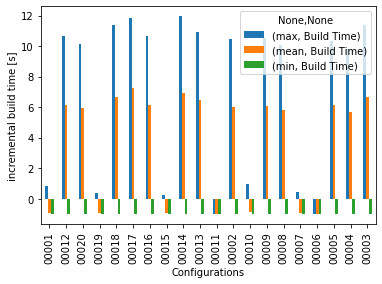

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

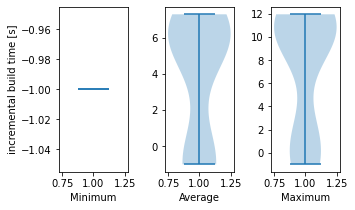

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,0.8615,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
00002,-1.0000,NaN,9.9475,10.4525,10.0180,-1.0000,-1.0000,10.2620,10.3235,-1.0,-1.0,10.2830,9.9420,10.2435,-1.0000,10.2635,9.9335,9.9660,-1.0000,9.9865
00003,-1.0000,10.9065,NaN,11.3025,10.9345,-1.0000,-1.0000,11.2805,11.2640,-1.0,-1.0,11.3635,11.0170,11.3710,-1.0000,11.4085,10.9300,10.9970,-1.0000,10.9570
00004,-1.0000,9.4630,9.4950,NaN,9.5565,-1.0000,-1.0000,9.7955,9.7655,-1.0,-1.0,9.8095,9.5175,9.7815,-1.0000,9.8035,9.4795,9.5110,-1.0000,9.4635
00005,-1.0000,10.0860,10.1140,10.3275,NaN,-1.0000,0.8135,10.1805,10.2535,-1.0,-1.0,10.2485,10.1760,10.3665,-1.0000,10.2820,10.1165,10.1395,-1.0000,10.0825
00006,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,NaN,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
00007,-1.0000,-1.0000,-1.0000,-1.0000,0.4720,-1.0000,NaN,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
00008,-1.0000,9.7450,9.8900,10.0735,9.8420,-1.0000,-1.0000,NaN,9.7400,-1.0,-1.0,9.7650,9.8015,9.7765,-1.0000,9.7430,9.7670,9.8735,-1.0000,9.8130
00009,-1.0000,10.1005,10.5535,10.4060,10.2635,-1.0000,-1.0000,10.1240,NaN,-1.0,-1.0,10.1910,10.2285,10.2395,-1.0000,10.2265,10.1200,10.2065,-1.0000,10.1340
